In [1]:
%matplotlib inline
import warnings
from matplotlib import font_manager, rc

# 경고메세지 끄기
warnings.filterwarnings(action='ignore')

# 한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

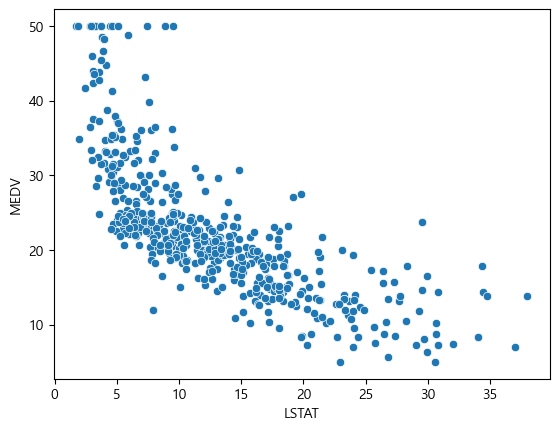

In [2]:
# 기계학습모형의 성능을 진단하고 성능을 개선하는 과정
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df_boston = pd.concat([dfX, dfy], axis=1)
# 두 변수는 비선형 관계임(인구중 하위계층 비율과 주택가격)
sns.scatterplot(x="LSTAT", y="MEDV", data=df_boston)
plt.show()

In [3]:
import statsmodels.api as sm

model1 = sm.OLS.from_formula("MEDV ~ LSTAT", data=df_boston)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           5.08e-88
Time:                        12:42:49   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

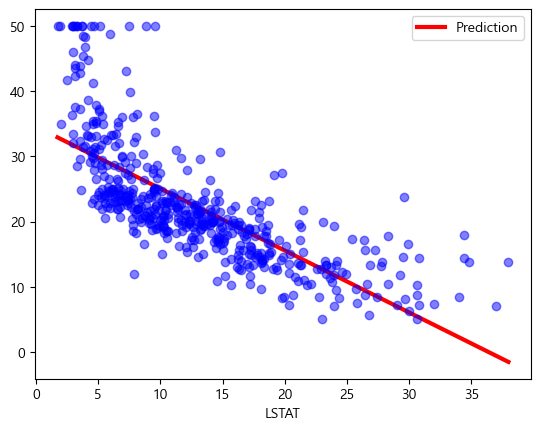

In [4]:
# 예측값과 실제값 비교
y_hat1 = result1.predict(df_boston)
df1 = pd.concat([y_hat1, df_boston.LSTAT], axis=1).sort_values("LSTAT")
df1.columns = ["Prediction", "LSTAT"]
df1.plot(x="LSTAT", style="r-", lw=3)
plt.plot(df_boston.LSTAT, df_boston.MEDV, 'bo', alpha=0.5)
plt.show()
# 예측력이 약한 모형

In [5]:
# LSTAT을 제곱한 비선형 독립변수를 추가한 모형
model2 = sm.OLS.from_formula("MEDV ~ LSTAT + I(LSTAT**2)", data=df_boston)
result2 = model2.fit()
print(result2.summary())
# 성능이 향상됨 54.4% => 64.1%

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          1.56e-112
Time:                        12:42:49   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149

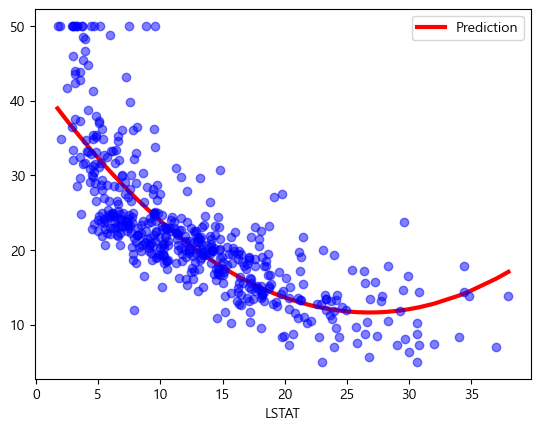

In [6]:
y_hat2 = result2.predict(df_boston)
df2 = pd.concat([y_hat2, df_boston.LSTAT], axis=1).sort_values("LSTAT")
df2.columns = ["Prediction", "LSTAT"]
df2.plot(x="LSTAT", style="r-", lw=3)
plt.plot(df_boston.LSTAT, df_boston.MEDV, 'bo', alpha=0.5)
plt.show()
# 선형보다 좀더 적합한 모형

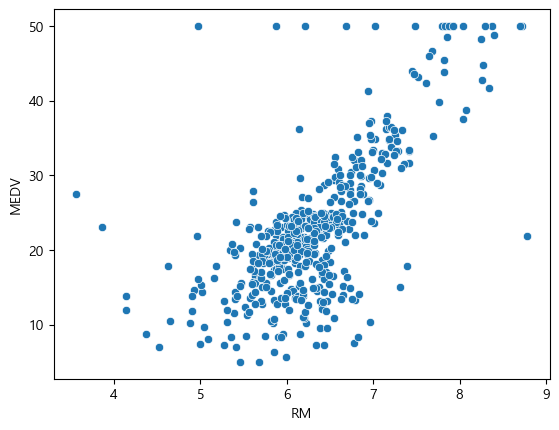

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64


In [7]:
# 범주형 변수의 예

# 방의 개수가 아주 적거나 아주 많으면 선형모형이 잘 맞지 않는다.
sns.scatterplot(x="RM", y="MEDV", data=df_boston)
plt.show()
print(df_boston['RM'])

In [8]:
model3 = sm.OLS.from_formula("MEDV ~ RM", data=df_boston)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           2.49e-74
Time:                        12:42:50   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

<AxesSubplot:xlabel='CAT_RM', ylabel='MEDV'>

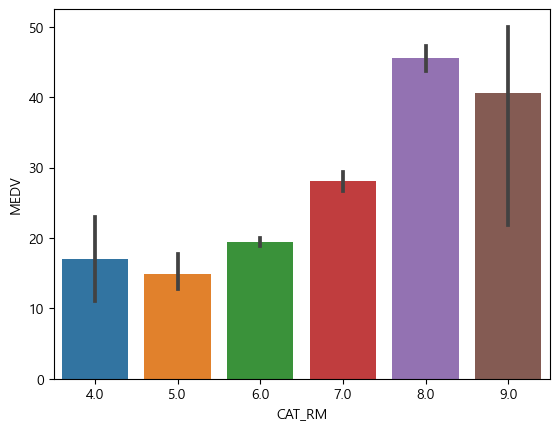

In [9]:
import numpy as np 
df_boston["CAT_RM"] = np.round(df_boston.RM)
sns.barplot(x="CAT_RM", y="MEDV", data=df_boston)

In [10]:
# 실수형을 정수형으로 바꾸고 더미변수를 사용한 모혀
model4 = sm.OLS.from_formula("MEDV ~ C(np.round(RM))+0", data=df_boston)
result4 = model4.fit()
print(result4.summary())
# 성능이 개선됨 48.4 => 53.7%

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     115.8
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           3.57e-81
Time:                        12:42:50   Log-Likelihood:                -1645.6
No. Observations:                 506   AIC:                             3303.
Df Residuals:                     500   BIC:                             3329.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
C(np.round(RM))[4.0]    17.0200 

In [11]:
# 독립변수가 시간인 경우 특정 시점에서 경과된 시간값으로 변형해야 함
# 일자별 전력수요량
df = pd.read_csv('c:/data/energy/data.csv')
df.head()

,Unnamed: 0,Demand,Date
0,0,174.896295,2019-01-01
1,1,188.590935,2019-01-02
2,2,188.916891,2019-01-03
3,3,173.814244,2019-01-04
4,4,169.515175,2019-01-05


In [12]:
import datetime as dt

df['Date'] = pd.to_datetime(df['Date'])
# toordinal 서기 1년 1월 1일을 기준으로 경과한 날짜
df["Ordinal"] = df.Date.map(dt.datetime.toordinal)
df["Timestamp"] = df.Date.map(dt.datetime.timestamp)
df.head()

,Unnamed: 0,Demand,Date,Ordinal,Timestamp
0,0,174.896295,2019-01-01,737060,1.546268e+09
1,1,188.590935,2019-01-02,737061,1.546355e+09
2,2,188.916891,2019-01-03,737062,1.546441e+09
3,3,173.814244,2019-01-04,737063,1.546528e+09
4,4,169.515175,2019-01-05,737064,1.546614e+09


In [13]:
# 일단위 날짜를 기준으로 분석, 날짜는 단위가 크므로 스케일링이 필요함
model5 = sm.OLS.from_formula("Demand ~ scale(Ordinal)", data=df)
result5 = model5.fit()
print(result5.summary())

                            OLS Regression Results                            
Dep. Variable:                 Demand   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     11.58
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           0.000739
Time:                        12:46:27   Log-Likelihood:                -1709.7
No. Observations:                 365   AIC:                             3423.
Df Residuals:                     363   BIC:                             3431.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        221.2775      1.374    160.

In [14]:
# 시간에서 활용할 수 있는 추가적인 필드들
df["Year"] = df.Date.dt.year
df["Month"] = df.Date.dt.month
df["DayOfYear"] = df.Date.dt.dayofyear      # 연중 몇일차
df["DayOfMonth"] = df.Date.dt.daysinmonth   # 일수
df["DayOfWeek"] = df.Date.dt.dayofweek
df["WeekOfYear"] = df.Date.dt.weekofyear    # 연중 몇주차
df["Weekday"] = df.Date.dt.weekday          # 요일코드
df["IsMonthStart"] = df.Date.dt.is_month_start
df["IsMonthEnd"] = df.Date.dt.is_month_end
df.tail()

,Unnamed: 0,Demand,Date,Ordinal,Timestamp,Year,Month,DayOfYear,DayOfMonth,DayOfWeek,WeekOfYear,Weekday,IsMonthStart,IsMonthEnd
360,360,173.727990,2019-12-27,737420,1.577372e+09,2019,12,361,31,4,52,4,False,False
361,361,188.512817,2019-12-28,737421,1.577459e+09,2019,12,362,31,5,52,5,False,False
362,362,191.273009,2019-12-29,737422,1.577545e+09,2019,12,363,31,6,52,6,False,False
363,363,186.240144,2019-12-30,737423,1.577632e+09,2019,12,364,31,0,1,0,False,False
364,364,186.370181,2019-12-31,737424,1.577718e+09,2019,12,365,31,1,1,1,False,True


In [15]:
formula = """
Demand ~ scale(Ordinal) + C(Month)+0 + DayOfYear + 
C(DayOfMonth)+0 + C(DayOfWeek)+0 + C(Weekday)+0 + 
C(IsMonthStart)+0 + C(IsMonthEnd)+0
"""
model6 = sm.OLS.from_formula(formula, data=df)
result6 = model6.fit()
print(result6.summary())
# 3.1%에서 53.7%로 향상됨

                            OLS Regression Results                            
Dep. Variable:                 Demand   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     19.98
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           4.74e-46
Time:                        12:47:35   Log-Likelihood:                -1574.8
No. Observations:                 365   AIC:                             3192.
Df Residuals:                     344   BIC:                             3273.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
C(Month)[1]               

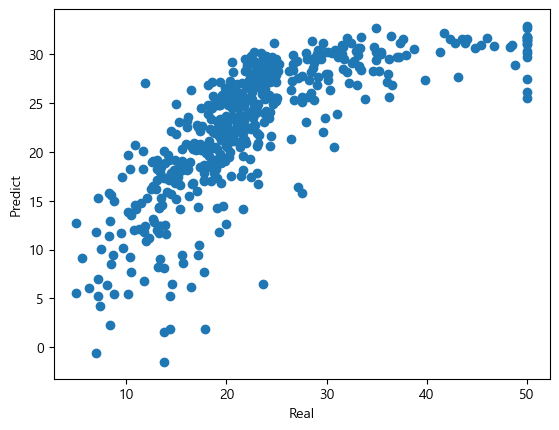

In [16]:
# 독립변수 뿐 아니라 상황에 따라서는 종속변수도 변형할 수 있음
# 실제주택가격과 예측값의 비교
plt.scatter(boston.target, y_hat1)
plt.xlabel('Real')
plt.ylabel('Predict')
plt.show()
# 선형적으로 설명하기 어려운 모형

In [17]:
# 종속변수를 제곱근 처리
model11 = sm.OLS.from_formula("np.sqrt(MEDV) ~ LSTAT", data=df_boston)
result11 = model11.fit()
print(result11.summary())

                            OLS Regression Results                            
Dep. Variable:          np.sqrt(MEDV)   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     789.7
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          3.09e-105
Time:                        12:58:55   Log-Likelihood:                -445.65
No. Observations:                 506   AIC:                             895.3
Df Residuals:                     504   BIC:                             903.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9499      0.053    112.374      0.0

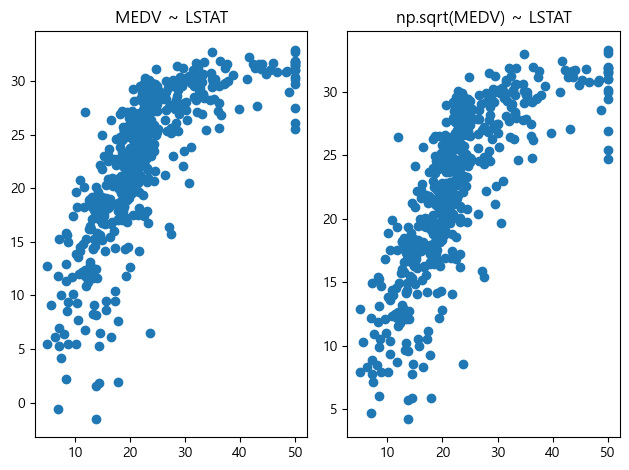

In [18]:
plt.subplot(121)
plt.scatter(boston.target, y_hat1)
plt.title("MEDV ~ LSTAT")
plt.subplot(122)
plt.scatter(boston.target, (result11.predict(df_boston))**2)
plt.title("np.sqrt(MEDV) ~ LSTAT")
plt.tight_layout()
plt.show()

In [19]:
# 로그를 취한 모형
model12 = sm.OLS.from_formula("np.log(MEDV) ~ LSTAT", data=df_boston)
result12 = model12.fit()
print(result12.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(MEDV)   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     928.1
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          2.23e-116
Time:                        12:59:45   Log-Likelihood:               -0.57634
No. Observations:                 506   AIC:                             5.153
Df Residuals:                     504   BIC:                             13.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6176      0.022    164.654      0.0

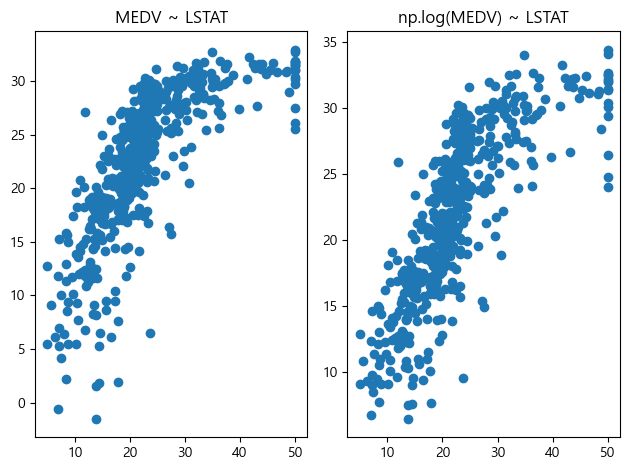

In [20]:
plt.subplot(121)
plt.scatter(boston.target, y_hat1)
plt.title("MEDV ~ LSTAT")
plt.subplot(122)
plt.scatter(boston.target, np.exp(result12.predict(df_boston)))
plt.title("np.log(MEDV) ~ LSTAT")
plt.tight_layout()
plt.show()

In [21]:
# 독립변수와 종속변수 모두 로그를 취한 모형(가장 성능이 좋은 모형)
model13 = sm.OLS.from_formula("np.log(MEDV) ~ np.log(LSTAT)",
data = df_boston)
result13 = model13.fit()
print(result13.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(MEDV)   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1058.
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          7.32e-126
Time:                        13:00:25   Log-Likelihood:                 21.325
No. Observations:                 506   AIC:                            -38.65
Df Residuals:                     504   BIC:                            -30.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.3618      0.042    103.603

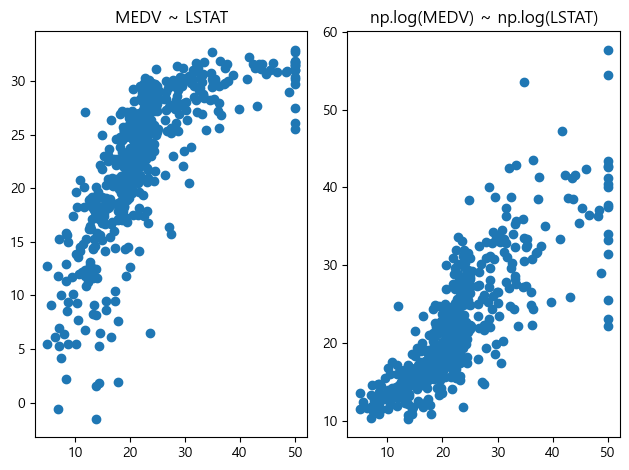

In [22]:
plt.subplot(121)
plt.scatter(boston.target, y_hat1)
plt.title("MEDV ~ LSTAT")
plt.subplot(122)
plt.scatter(boston.target, np.exp(result13.predict(df_boston)))
plt.title("np.log(MEDV) ~ np.log(LSTAT)")
plt.tight_layout()
plt.show()